# In this notebook we visualize effects of inserting a single CTCF in multiple backgrounds

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns

# sns.set_theme()
import akita_utils.format_io

# Importing scores from simulations

In [2]:
# def load_data(h5_dirs, scd_stats, models=[1]):
#     dfs = []
#     for h5_file in glob.glob(h5_dirs):
        
#         dfs.append(
#             akita_utils.format_io.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None)
#         )
#     dfs = pd.concat(dfs)

#     for stat in scd_stats:
#         for model in models:
#             dfs[f"mean_{stat}_score_m{model}"] = (
#                 dfs[f"{stat}_h1_m{model}_t0"]
#                 + dfs[f"{stat}_h1_m{model}_t1"]
#                 + dfs[f"{stat}_h1_m{model}_t2"]
#                 + dfs[f"{stat}_h1_m{model}_t3"]
#                 + dfs[f"{stat}_h1_m{model}_t4"]
#                 + dfs[f"{stat}_h1_m{model}_t5"]
#             ) / 6
        
#     return dfs.reset_index(drop=True)


# import numpy as np

def load_data(h5_dirs, scd_stats, models=[1]):
    dfs = []
    for h5_file in glob.glob(h5_dirs):
        
        dfs.append(
            akita_utils.format_io.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None)
        )
    # dfs = pd.concat(dfs)
    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = pd.merge(merged_df, df, on='background_seqs', how='inner', suffixes=('_left', '_right'))

    # dfs = merged_df
    # df_1 = dfs[0]
    for stat in scd_stats:
        for model in models:
            merged_df[f"mean_{stat}_score_m{model}"] = (
                merged_df[f"{stat}_h1_m{model}_t0"]
                + merged_df[f"{stat}_h1_m{model}_t1"]
                + merged_df[f"{stat}_h1_m{model}_t2"]
                + merged_df[f"{stat}_h1_m{model}_t3"]
                + merged_df[f"{stat}_h1_m{model}_t4"]
                + merged_df[f"{stat}_h1_m{model}_t5"]
            ) / 6
        
        # Calculate mean score over models for current statistic
        mean_score = np.mean([
            merged_df[f"mean_{stat}_score_m{model}"] for model in models
        ], axis=0)
        
        # Add mean score column to DataFrame
        merged_df[f"mean_{stat}_score"] = mean_score
    
    return merged_df.reset_index(drop=True)


In [3]:
one_strong_motif_in_different_backgrounds_h5_dirs = (
 "/scratch1/kamulege/insert_experiments/one_strong_motif_in_different_backgrounds_config_test_x/*/*/*.h5"
)
one_weak_motif_in_different_backgrounds_h5_dirs = (
 "/scratch1/kamulege/insert_experiments/one_weak_motif_in_different_backgrounds_config_test_x/*/*/*.h5"
)
two_strong_motif_in_different_backgrounds_h5_dirs = (
 "/scratch1/kamulege/insert_experiments/two_strong_motif_in_different_backgrounds/*.h5"
)
two_weak_motif_in_different_backgrounds_h5_dirs = (
 "/scratch1/kamulege/insert_experiments/two_weak_motif_in_different_backgrounds/*.h5"
)

scd_stats = ["SCD"]

one_strong_motif_in_different_backgrounds_df = load_data(one_strong_motif_in_different_backgrounds_h5_dirs, scd_stats=["SCD", "SSD"], models=[0,1,2,3,4,5,6,7])
one_weak_motif_in_different_backgrounds_df = load_data(one_weak_motif_in_different_backgrounds_h5_dirs, scd_stats=["SCD", "SSD"], models=[0,1,2,3,4,5,6,7])
two_strong_motif_in_different_backgrounds_df = load_data(two_strong_motif_in_different_backgrounds_h5_dirs, scd_stats, models=[0])
two_weak_motif_in_different_backgrounds_df = load_data(two_weak_motif_in_different_backgrounds_h5_dirs, scd_stats, models=[0])

one_strong_motif_in_different_backgrounds_df

/tmp/SLURM_13191975/ipykernel_168042/1325207131.py:36: FutureWarning: Passing 'suffixes' which cause duplicate columns {'CTCF_1_genomic_SCD_left', 'CTCF_1_insert_left'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, df, on='background_seqs', how='inner', suffixes=('_left', '_right'))
/tmp/SLURM_13191975/ipykernel_168042/1325207131.py:36: FutureWarning: Passing 'suffixes' which cause duplicate columns {'CTCF_1_genomic_SCD_left', 'CTCF_1_insert_left'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, df, on='background_seqs', how='inner', suffixes=('_left', '_right'))
/tmp/SLURM_13191975/ipykernel_168042/1325207131.py:36: FutureWarning: Passing 'suffixes' which cause duplicate columns {'CTCF_1_genomic_SCD_left', 'CTCF_1_insert_left'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, df, on='background_seq

,CTCF_1_genomic_SCD_left,CTCF_1_insert_left,SCD_h1_m6_t0,SCD_h1_m6_t1,SCD_h1_m6_t2,SCD_h1_m6_t3,SCD_h1_m6_t4,SCD_h1_m6_t5,SSD_h1_m6_t0,SSD_h1_m6_t1,...,mean_SCD_score,mean_SSD_score_m0,mean_SSD_score_m1,mean_SSD_score_m2,mean_SSD_score_m3,mean_SSD_score_m4,mean_SSD_score_m5,mean_SSD_score_m6,mean_SSD_score_m7,mean_SSD_score
0,53.66,"chr12,35192359,35192378,-,60,0,>",51.43750,63.46875,48.09375,49.18750,53.87500,45.06250,51.43750,63.46875,...,58.09375,57.09375,63.28125,54.90625,65.37500,52.40625,64.31250,51.84375,55.53125,58.09375
1,53.66,"chr12,35192359,35192378,-,60,0,>",42.71875,56.68750,51.84375,52.84375,53.37500,44.53125,42.71875,56.68750,...,56.78125,54.15625,62.37500,58.21875,53.71875,60.25000,67.87500,50.34375,47.37500,56.78125
2,53.66,"chr12,35192359,35192378,-,60,0,>",57.40625,74.87500,52.93750,53.53125,61.09375,49.37500,57.40625,74.87500,...,64.31250,52.37500,70.37500,68.75000,63.87500,66.68750,68.93750,58.15625,65.31250,64.31250
3,53.66,"chr12,35192359,35192378,-,60,0,>",60.37500,74.56250,58.37500,57.81250,66.00000,54.75000,60.37500,74.56250,...,67.75000,75.43750,66.81250,71.43750,58.34375,66.68750,71.62500,62.00000,69.75000,67.75000
4,53.66,"chr12,35192359,35192378,-,60,0,>",69.93750,92.68750,98.81250,102.00000,93.75000,80.62500,69.93750,92.68750,...,74.81250,76.93750,79.81250,72.00000,55.46875,77.18750,75.25000,89.68750,72.06250,74.81250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,53.66,"chr12,35192359,35192378,-,60,0,>",63.09375,81.81250,76.12500,80.75000,77.06250,66.50000,63.09375,81.81250,...,64.31250,61.50000,74.50000,66.18750,57.09375,67.50000,62.34375,74.18750,51.28125,64.31250
84,53.66,"chr12,35192359,35192378,-,60,0,>",59.15625,78.12500,67.81250,69.31250,71.06250,59.56250,59.15625,78.12500,...,69.43750,68.62500,71.00000,69.25000,64.81250,68.68750,77.43750,67.43750,68.43750,69.43750
85,53.66,"chr12,35192359,35192378,-,60,0,>",55.53125,66.31250,64.00000,63.28125,62.59375,52.62500,55.53125,66.31250,...,59.84375,65.43750,69.56250,56.09375,62.12500,50.62500,69.50000,60.75000,44.59375,59.84375
86,53.66,"chr12,35192359,35192378,-,60,0,>",61.65625,79.18750,80.62500,82.68750,79.06250,67.18750,61.65625,79.18750,...,67.12500,68.25000,76.31250,59.90625,58.37500,61.59375,66.56250,75.06250,70.68750,67.12500


In [4]:
one_strong_motif_in_different_backgrounds_df.columns

Index(['CTCF_1_genomic_SCD_left', 'CTCF_1_insert_left', 'SCD_h1_m6_t0',
       'SCD_h1_m6_t1', 'SCD_h1_m6_t2', 'SCD_h1_m6_t3', 'SCD_h1_m6_t4',
       'SCD_h1_m6_t5', 'SSD_h1_m6_t0', 'SSD_h1_m6_t1',
       ...
       'mean_SCD_score', 'mean_SSD_score_m0', 'mean_SSD_score_m1',
       'mean_SSD_score_m2', 'mean_SSD_score_m3', 'mean_SSD_score_m4',
       'mean_SSD_score_m5', 'mean_SSD_score_m6', 'mean_SSD_score_m7',
       'mean_SSD_score'],
      dtype='object', length=131)

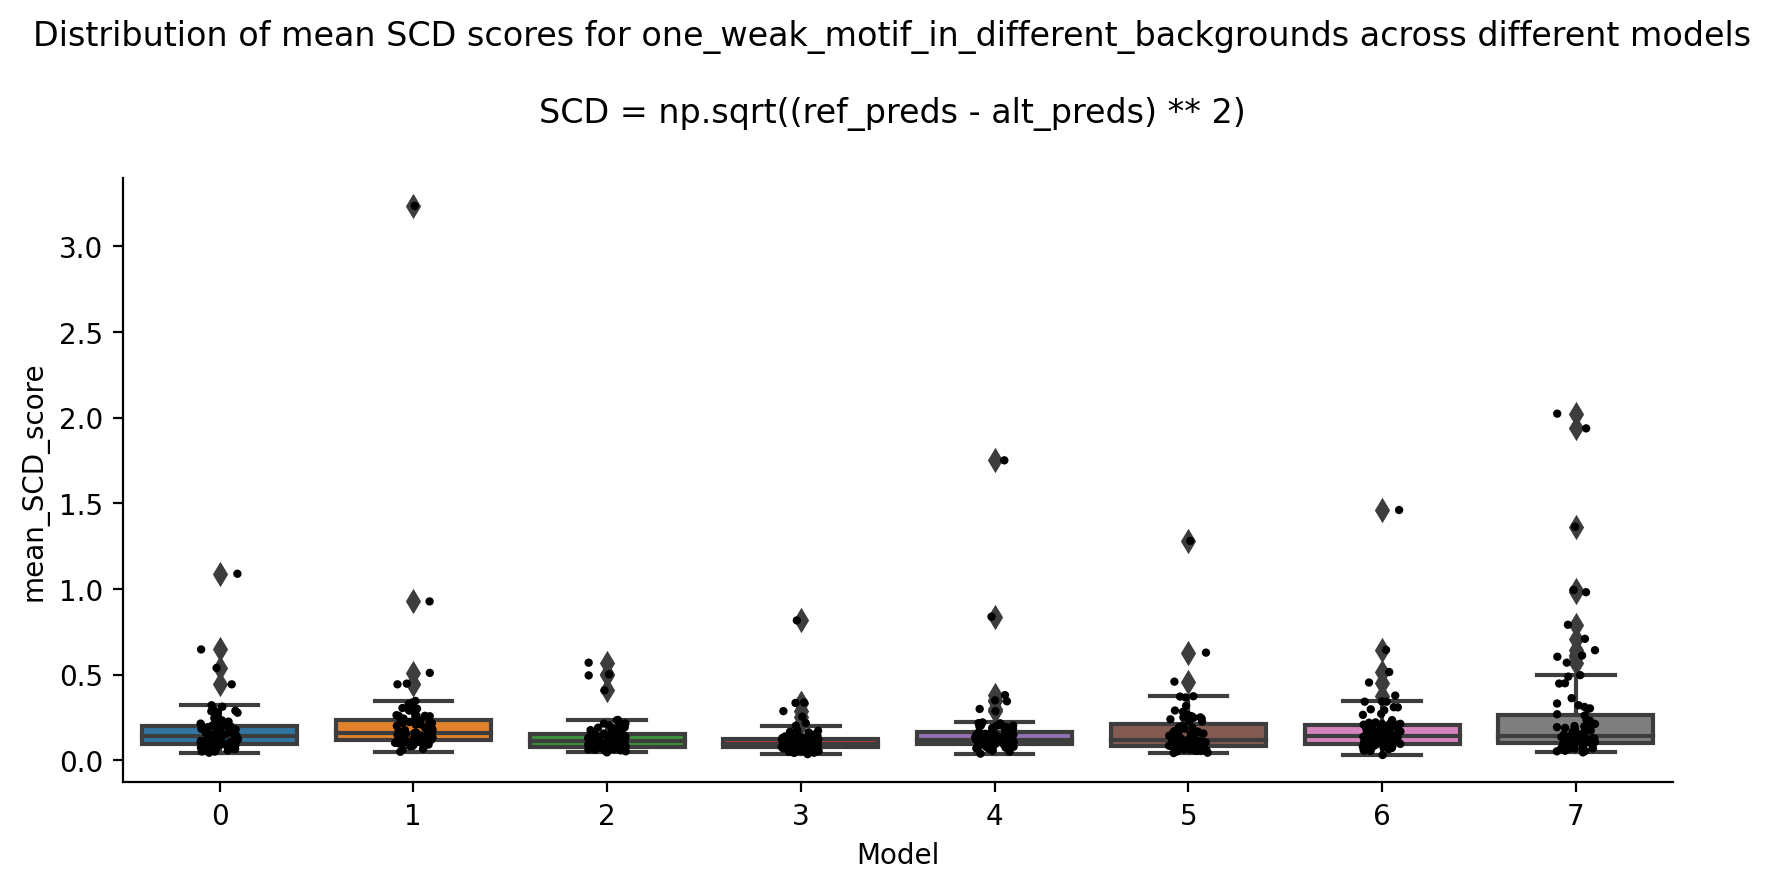

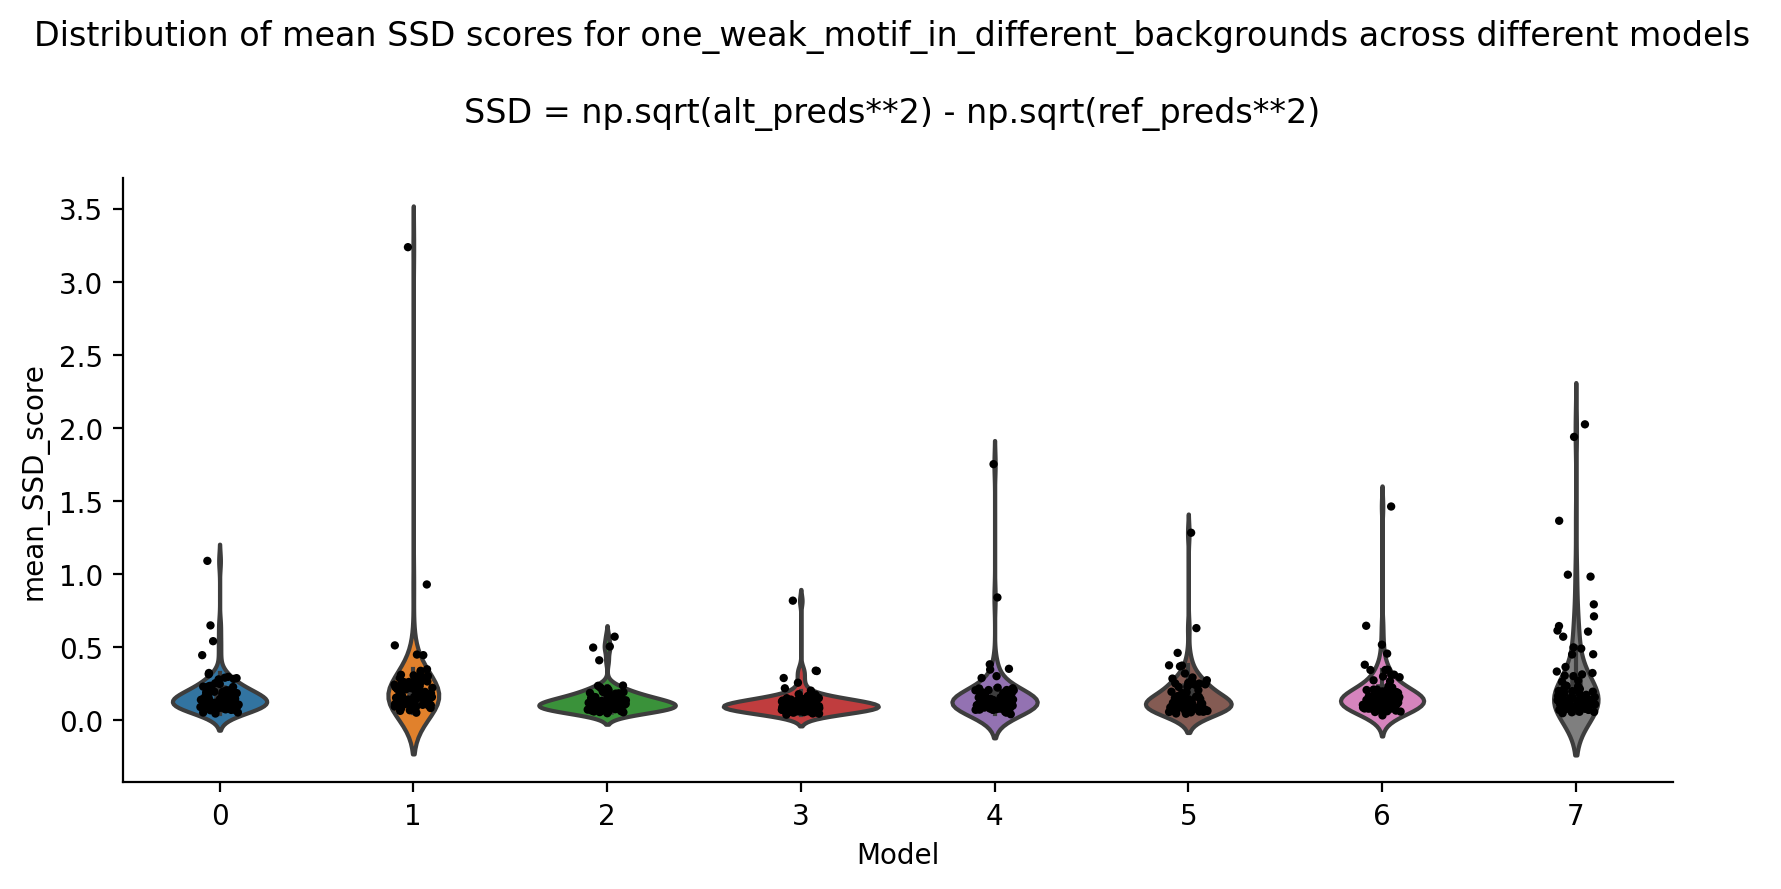

In [19]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)

data = [one_weak_motif_in_different_backgrounds_df[f"mean_SCD_score_m{i}"] for i in range(8)]

sns.boxplot(
    data=data,
    ax=ax,
)
sns.stripplot(
    data=data,
    ax=ax,
    jitter=True,
    color='black',
    size=3
)

sns.despine(top=True, right=True)

ax.set_xlabel("Model")
ax.set_ylabel("mean_SCD_score")

plt.title("Distribution of mean SCD scores for one_weak_motif_in_different_backgrounds across different models \n \nSCD = np.sqrt((ref_preds - alt_preds) ** 2) \n ")
plt.show()


fig, ax = plt.subplots(figsize=(10, 4), dpi=200)

data = [one_weak_motif_in_different_backgrounds_df[f"mean_SSD_score_m{i}"] for i in range(8)]

sns.violinplot(
    data=data,
    ax=ax,
)
sns.stripplot(
    data=data,
    ax=ax,
    jitter=True,
    color='black',
    size=3
)

sns.despine(top=True, right=True)

ax.set_xlabel("Model")
ax.set_ylabel("mean_SSD_score")

plt.title("Distribution of mean SSD scores for one_weak_motif_in_different_backgrounds across different models \n \nSSD = np.sqrt(alt_preds**2) - np.sqrt(ref_preds**2) \n ")
plt.show()




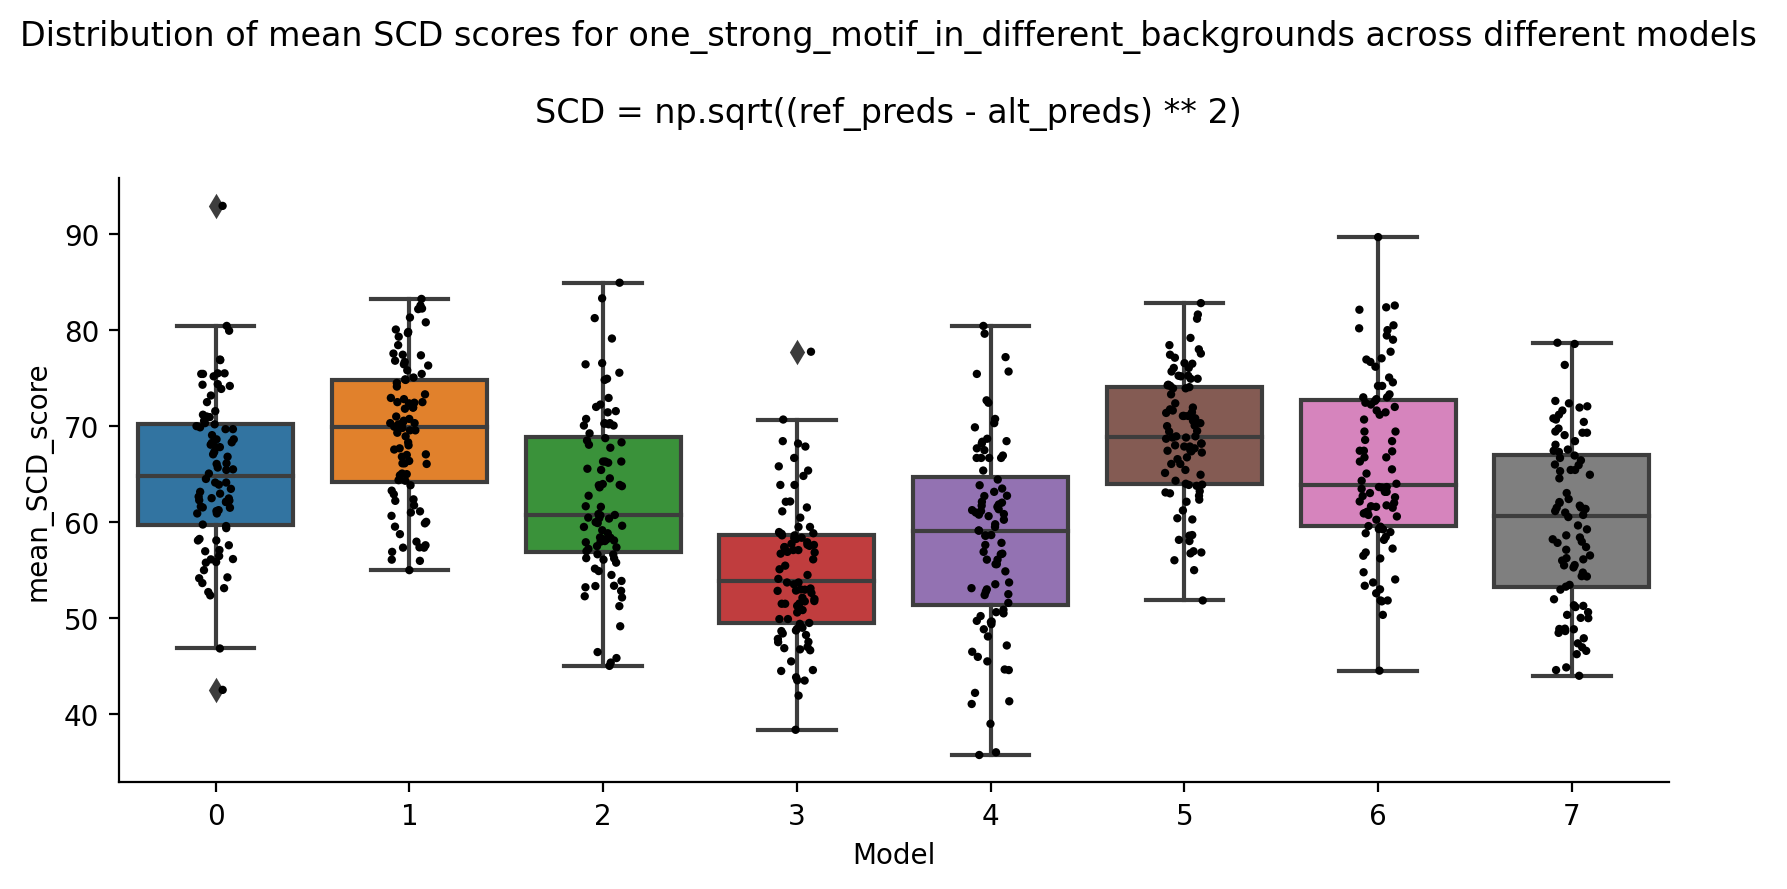

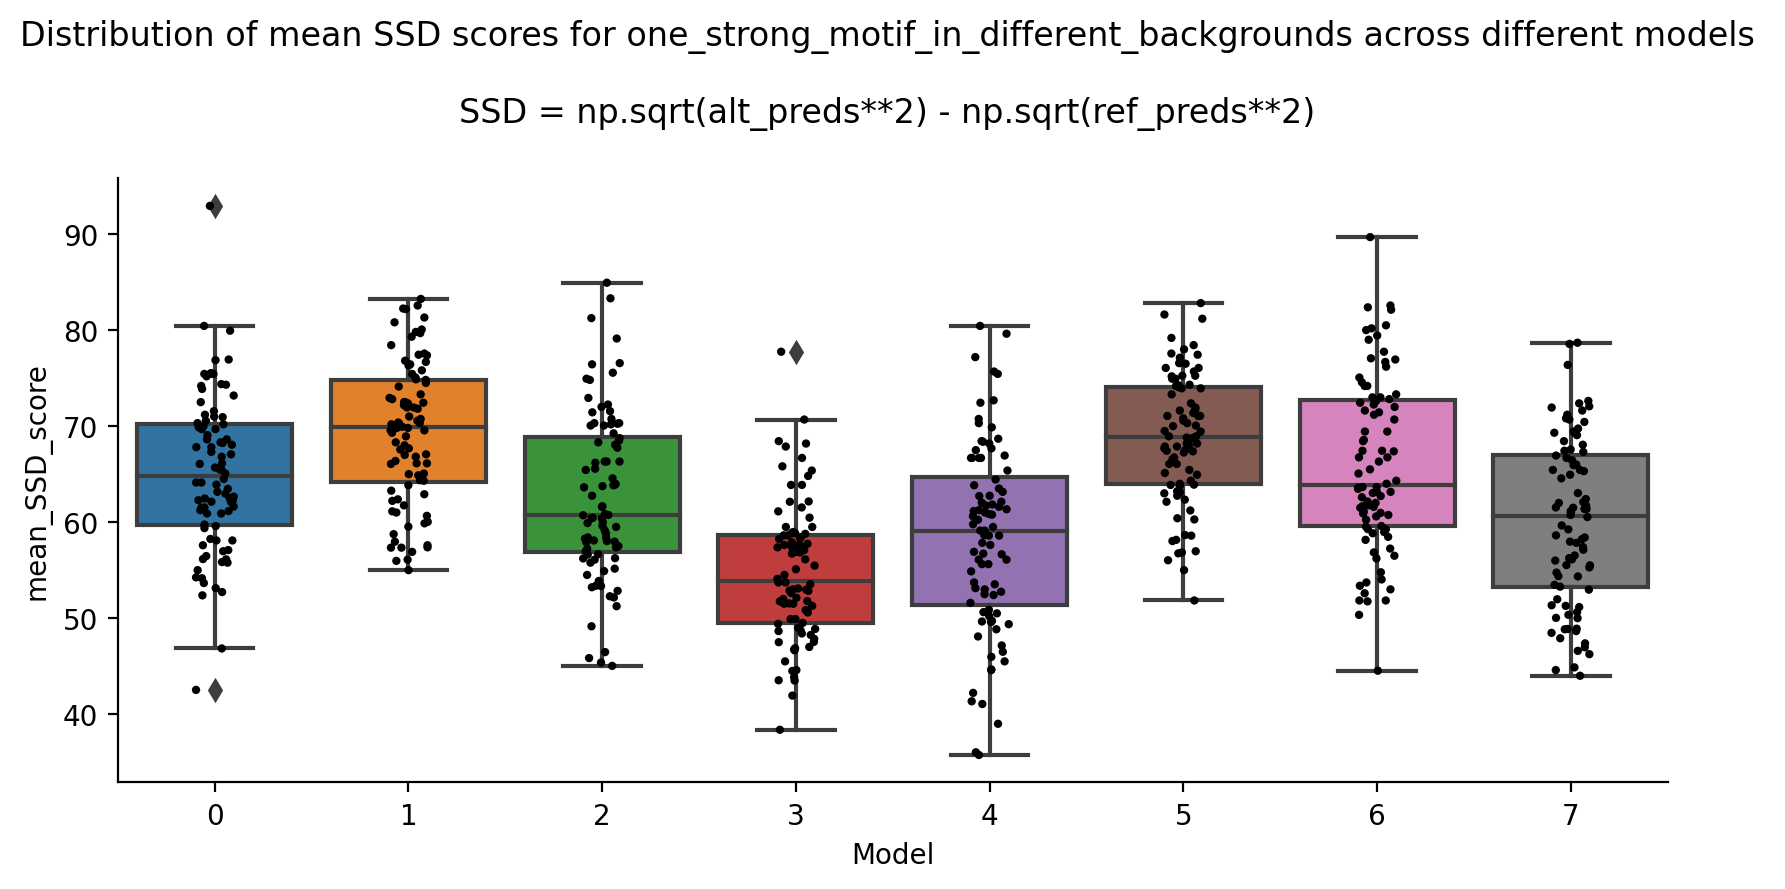

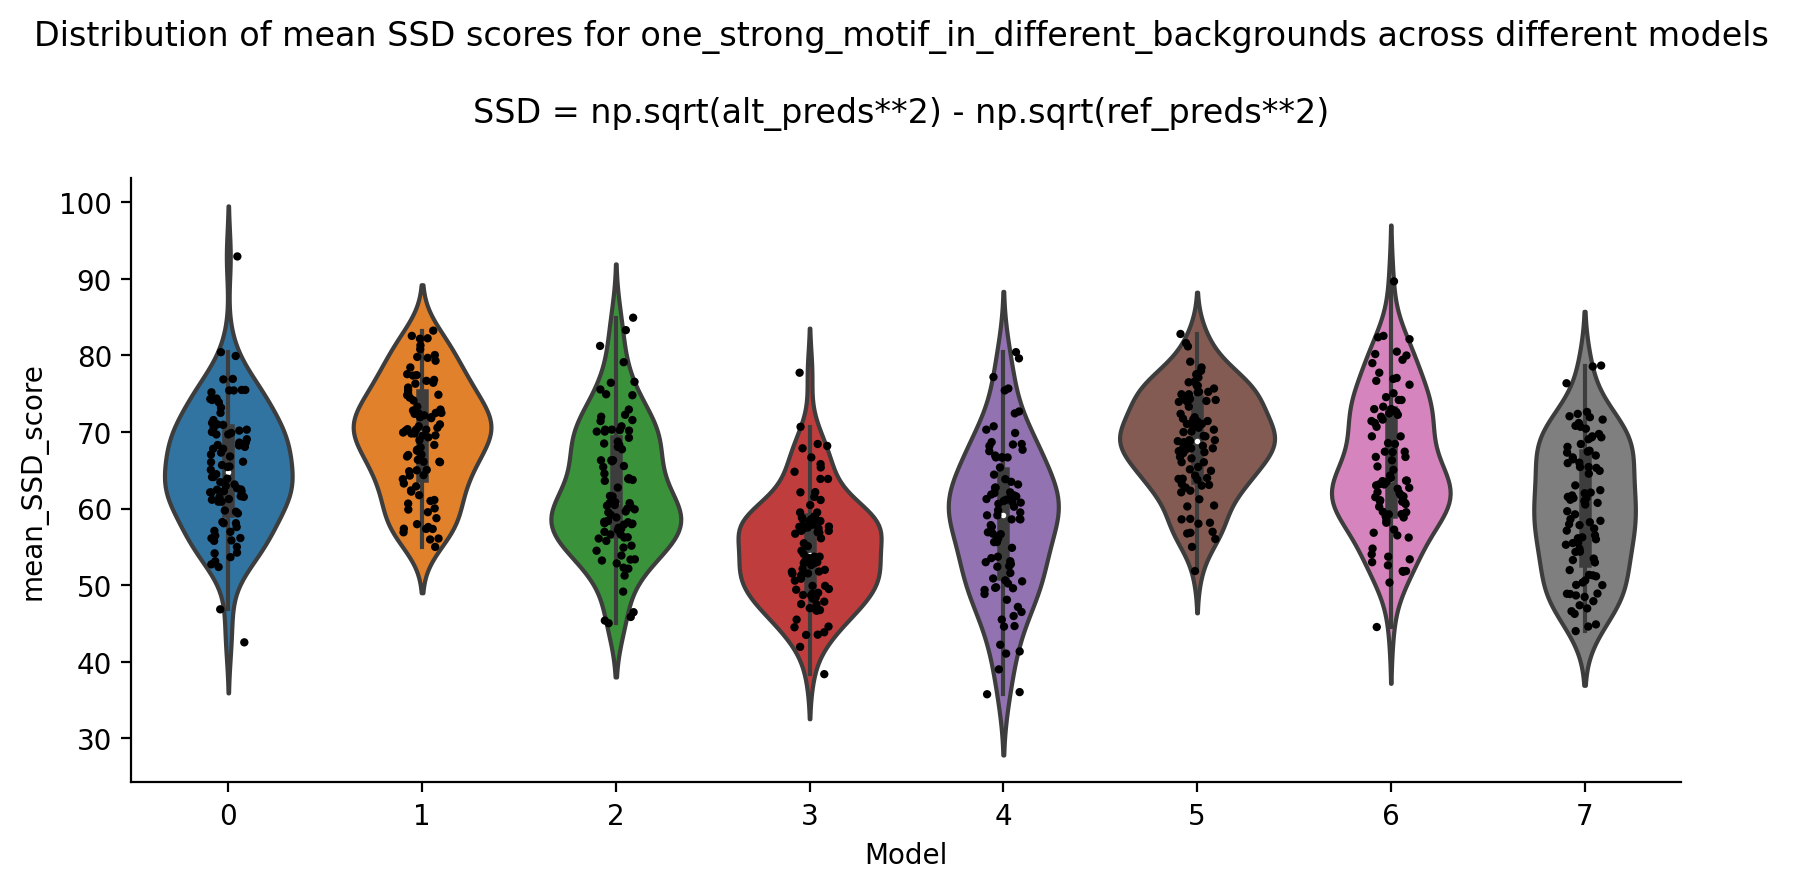

In [20]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)

data = [one_strong_motif_in_different_backgrounds_df[f"mean_SCD_score_m{i}"] for i in range(8)]

sns.boxplot(
    data=data,
    ax=ax,
)
sns.stripplot(
    data=data,
    ax=ax,
    jitter=True,
    color='black',
    size=3
)

sns.despine(top=True, right=True)

ax.set_xlabel("Model")
ax.set_ylabel("mean_SCD_score")

plt.title("Distribution of mean SCD scores for one_strong_motif_in_different_backgrounds across different models \n  \nSCD = np.sqrt((ref_preds - alt_preds) ** 2) \n ")
plt.show()


fig, ax = plt.subplots(figsize=(10, 4), dpi=200)

data = [one_strong_motif_in_different_backgrounds_df[f"mean_SSD_score_m{i}"] for i in range(8)]

sns.boxplot(
    data=data,
    ax=ax,
)
sns.stripplot(
    data=data,
    ax=ax,
    jitter=True,
    color='black',
    size=3
)

sns.despine(top=True, right=True)

ax.set_xlabel("Model")
ax.set_ylabel("mean_SSD_score")

plt.title("Distribution of mean SSD scores for one_strong_motif_in_different_backgrounds across different models \n \nSSD = np.sqrt(alt_preds**2) - np.sqrt(ref_preds**2) \n ")
plt.show()


import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 4), dpi=200)

data = [one_strong_motif_in_different_backgrounds_df[f"mean_SSD_score_m{i}"] for i in range(8)]

sns.violinplot(
    data=data,
    ax=ax,
)
sns.stripplot(
    data=data,
    ax=ax,
    jitter=True,
    color='black',
    size=3
)
# sns.swarmplot(
#     data=data,
#     ax=ax,
#     color='red',
#     size=2,
#     alpha=0.5
# )

sns.despine(top=True, right=True)

ax.set_xlabel("Model")
ax.set_ylabel("mean_SSD_score")

plt.title("Distribution of mean SSD scores for one_strong_motif_in_different_backgrounds across different models \n \nSSD = np.sqrt(alt_preds**2) - np.sqrt(ref_preds**2) \n ")

plt.show()

